<a href="https://colab.research.google.com/github/Mudita8373/K_mean_clustering/blob/main/Kmeans_clg_dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [ ]:
data = pd.read_csv("college_data.csv")
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [ ]:
pd.set_option('display.float', '{:.2f}'.format)
data.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.80,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.80,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.00,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.00,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.00,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


In [ ]:
data.loc[data.grad_rate > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.30,20,7697,118


In [ ]:
data.loc[data.grad_rate > 100, 'grad_rate'] = 100

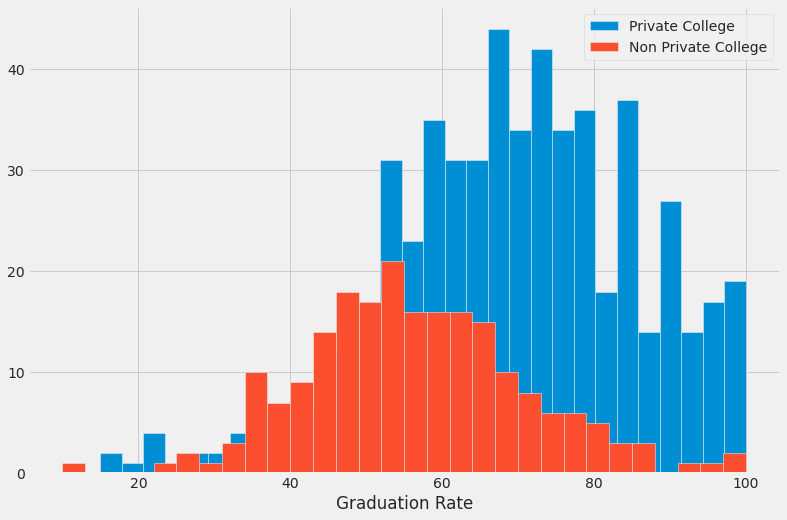

In [ ]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(data.drop('private', axis=1))
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

In [ ]:
#Evaluation
data['private'] = data.private.astype("category").cat.codes
data.private

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: private, Length: 777, dtype: int8

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(data.private, kmeans.labels_))
print(classification_report(data.private, kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(data.private, kmeans.labels_))
print(pd.DataFrame(classification_report(data.private, kmeans.labels_, output_dict=True)))

0.7786357786357786
               0      1  accuracy  macro avg  weighted avg
precision   0.69   0.79      0.78       0.74          0.76
recall      0.35   0.94      0.78       0.64          0.78
f1-score    0.46   0.86      0.78       0.66          0.75
support   212.00 565.00      0.78     777.00        777.00


In [ ]:
#Scaling data
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('private', axis=1)
y = data.private

X = scalar.fit_transform(X)

kmeans = KMeans(2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))
print(classification_report(y, kmeans.labels_))

[[ 0.54548844  0.50988814  0.41992248  0.83361106  0.83951561  0.36917718
   0.06427689  0.76478882  0.6226721   0.20329475 -0.08142105  0.81940114
   0.80008284 -0.39387442  0.51295406  0.70919469  0.60419735]
 [-0.32661962 -0.30530339 -0.25143507 -0.49913749 -0.50267293 -0.22105053
  -0.03848678 -0.45792911 -0.37283453 -0.12172587  0.04875211 -0.49062908
  -0.47906195  0.23583839 -0.30713916 -0.42464126 -0.36177249]]
0.5225225225225225
[[ 66 146]
 [225 340]]
              precision    recall  f1-score   support

           0       0.23      0.31      0.26       212
           1       0.70      0.60      0.65       565

    accuracy                           0.52       777
   macro avg       0.46      0.46      0.45       777
weighted avg       0.57      0.52      0.54       777

